### **Le coût de la vie en Colombie, un arbitrage multiple**

Le modèle monocentrique : un outil pour étudier le gradient distance-logement des dépenses et pour capturer l'effet taille d'un pays en développement

## Introduction : Motivation et courte revue de la littérature

L'analyse du coût de la vie dans les différents territoires est d'une importance cruciale de nos jours. Les mouvements sociaux récents tels que les *Gilets Jaunes*, *Insulate Britain*, et surtout la pandémie de la *Covid-19*, ont exacerbé les inégalités socio-spatiales, générant des "géographies du mécontentement" (*Rodriguez-Pose, 2020*). Ces événements mettent en lumière l'urgence et l'actualité de la question du coût de la vie dans le monde entier. Si ce problème est global, il revêt une importance particulière dans les pays en développement où les aspects urbains nécessitent une attention plus approfondie (*Bryan et al., 2020; pp. 290, 291*).

Notre analyse du coût de la vie repose sur un modèle monocentrique simplifié et vise à évaluer les effets de l'agglomération dans le contexte du développement.

- **(a) Pourquoi le modèle monocentrique est-il pertinent pour étudier le coût de la vie ?** Empiriquement, ce modèle reflète la réalité économique. En termes absolus, il capture une part significative de la variabilité du coût de la vie entre différents territoires : environ 50 % du budget des ménages est attribué au transport et au logement (références et données manquantes). Ce modèle permet également de comparer différents territoires en termes de politiques publiques pour identifier les gagnants et les perdants des effets d'agglomération.

- **(b) Évoquer les effets d'agglomérations et justifier l'usage du modèle monocentrique.** Les effets d'agglomérations justifient l'utilisation d'un modèle monocentrique : pour un territoire donné, une activité économique accrue entraîne une densification, stimulant la demande pour les commodités, ce qui impacte le coût de la vie et favorise la périurbanisation. Ce modèle présente également un intérêt dans l'étude des pays en développement, identifiant un canal de transmission inversé lié au développement économique. L'étude précise de ce problème de reverse causality vise à réduire la surestimation de l'effet taille.

- **(c) Importance de l'étude de ce modèle pour la Colombie.** La Colombie, caractérisée par une grande diversité socio-spatiale, présente probablement une organisation polycentrique. Il est crucial de tester cette hypothèse. En outre, la richesse des données disponibles le permet (avec la variable Utilrank). Avant d'aborder le point (a), il est essentiel de mettre en évidence le paradoxe entre la mixité sociale et l'agglomération, montrant ainsi la possibilité d'envisager un résultat polycentrique. Les explications sociologiques, souvent omises par les modèles économiques, offrent une finesse d'analyse importante.

## Question : Dualité socio-spatiale en Colombie : monocentrisme ou polycentrisme ?

La Colombie, en tant que pays en développement, présente une dualité marquée : elle se distingue non seulement par une forte mixité sociale selon les territoires, mais également par des densités de population élevées et des effets d'agglomération. Cette dualité soulève des questionnements concernant la validité du modèle monocentrique classique pour décrire la structure du pays. Ainsi, nous nous interrogeons sur la configuration structurelle de la Colombie, monocentrique ou polycentrique. Répondre à cette question permet non seulement d'identifier les territoires les plus désavantagés, mais aussi de formuler des recommandations visant à revitaliser et à redynamiser ces zones.


Attention : il faut lancer ce Notebook 0_main.ipynb sur [SSP cloud](https://datalab.sspcloud.fr/launcher/ide/jupyter-python?version=1.13.22)

### Plan : 

1. **_Collecte et traitement des donées_**

1.1. _Collecte_

Les données utilisées sont issues de la grande enquête sur les ménages de Colombie de la _DANE_ (département administratif national de statistiques en Colombie). Ces données proviennent de leur API que nous avions du télécharger et ajouter dans le repository GitHub (/data). En effet, un captcha empêchaît le scrapping. Nous avons récupéré un fichier zip sur le site de la DANE correspondant au mois de décembre 2021 (**http://microdatos.dane.gov.co/index.php/catalog/701/get_microdata**). 
Nous avons par la suite automatisé un code permettant de dézipper le fichier zip afin d'extraire toutes les bases de données présentes dans ce fichier et de les placer dans un dossier "data" dans notre repository. 

1.2. _Traitement de données_

*1.2.a. Les merges*
   
À date fixée (un mois donné, ici décembre), on merge les trois différentes couches géographiques (capitale(area), periurbain(cabecerra), rural). On analyse aussi avec les poids de sondages ainsi que les autres bases de données disponibles (Enero.dta, Julio.dta) si notre processing des données jusqu'à maintenant est cohérent.

Cette étape est aussi une occasion d'explorer les données.

In [ ]:
%run '1_extract_merge_attrition_3.ipynb'

2. Data cleaning, traitement des variables*

Exploration plus en profondeur de la base 

Cleaning (unité de consommation, statut de propriété, vecteurs d'amenités)

Construction de nos variables dépendentes y, les loyers (réels et imputés)   

Création d'une variable catégorielle de territoire selon la densité de population. 

In [ ]:
%run "2_data_cleaning.ipynb"

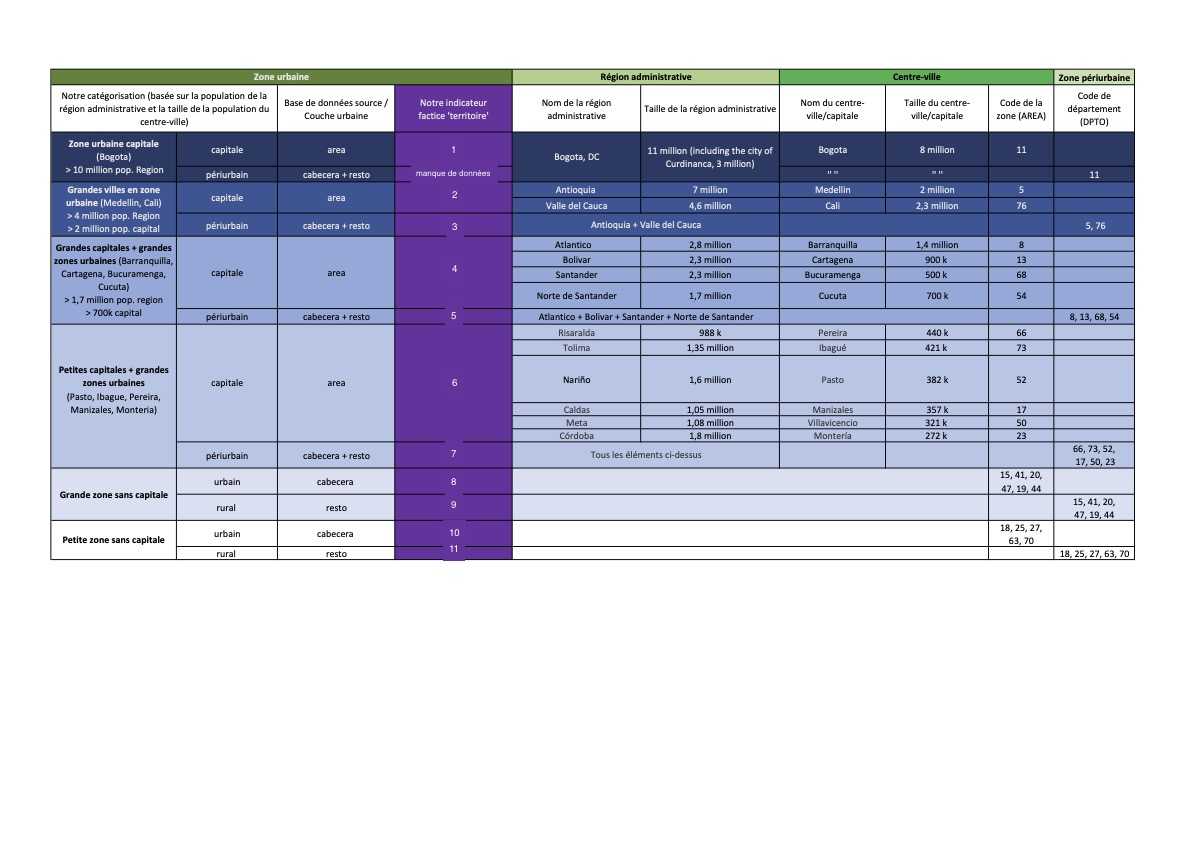

In [8]:
from PIL import Image

# Charger l'image
img = Image.open('territoires.jpg')

# Afficher l'image
img.show()

La variable categorielle de territore permet de mesurer l'arbitrage distance-logement, entre les coûts de logement et la distance par rapport au centre de la zone urbaine. Notre étude regroupera les zones urbaines et les capitales ayant une taille de population comparable : les zones urbaines colombiennes sont organisées en cercles concentriques, le centre étant la capitale (« area » en espagnol), la « cabecera » représentant la zone periurbaine, et le cercle le plus extérieur représentant les zones rurales. Cette variable territoriale est importante car elle permet de repérer des patterns dans les différences dans la consommation en logement selon la catégorie de territoire. Cette structure administrative de la Colombie en cercles concentriques suggère une stratification monocentrique de l'activité économique, un effet d'agglomération, donc nous nous attendons donc à un fort effet monocentrique entre les dépenses en logement et la distance par rapport au centre.

Quant à la variable Utilrank, elle capture la répartition intra-territoriale de l'inégalité économique, et pour la capitale Bogota, nous n'attendons donc pas de monocentrisme. En effet, la région du district de Bogota se confond avec la ville capitale elle-meme. Deuxièmement, le Utilrank est attribué spatialement et prend donc en compte la mixité sociale et spatiale au sein d'une zone urbaine. En tant que telle, la ville de Bogota étant socialement et économiquement diverse, il peut ne pas y avoir une organisation monocentrique, mais plutôt polycentrique.

3. **_Statistiques descriptives et cartes_**

* sur la base de donnée 

In [ ]:
%run "3_stat_desc_sur_la_base.ipynb" 

* sur la population, en les cartographiant avec les poids de sondage

In [ ]:
%run "3_coordinates_for_map.ipynb"

4. **_Modélisation : étude du coût de la vie avec les dépenses en logement_**

* 4.1 Analyse inter-territoriale : Regression baseline du coût du logement selon le territoire de résidence

In [ ]:
# la regression baseline avec la variable de territoire en regresseur

In [ ]:
%cd /home/onyxia/work/monocentric-model-colombia-2021
%run "3_reg_and_tests.ipynb" 

* 4.2 Analyse inter-territoriale : Regression enrichie et corrigée de la surestimation : selection des variables avec une nested LASSO

In [ ]:
# la selection de variables (vecteur d'amenités)

In [ ]:
%cd /home/onyxia/work/monocentric-model-colombia-2021
%run "4_lasso_further_reg.ipynb" 

In [ ]:
# # la regression finale (regression baseline + vecteur d'amenités)

In [ ]:
%cd /home/onyxia/work/monocentric-model-colombia-2021
%run "4_reg_finale.ipynb" 

* 4.3 Analyse intra-territoriale : Zoom et regression sur le département de Bogota

In [ ]:
%cd /home/onyxia/work/monocentric-model-colombia-2021
%run "4_reg_intra_territoire.ipynb" 

Bibliographie du Projet: 

- Bryan, G., Glaeser, E., Tsivanidis, N. (2020). [Cities in the Developing World](https://www.annualreviews.org/doi/abs/10.1146/annurev-economics-080218-030303)
- DANE (2023) [Gran Encuesta Integrada de Hogares 2021](https://www.datos.gov.co/Estad-sticas-Nacionales/Gran-Encuesta-Integrada-de-Hogares-GEIH/mcpt-3dws/about_data)
- France Strategie (2023) [Depenses de Logement et Transports : Quel Arbitrage? ](https://www.strategie.gouv.fr/sites/strategie.gouv.fr/files/atoms/files/fs-2023-na117-logement-transport-fevrier_0.pdf)
- Medina et al. (2007) [Stratification and Public Utility Services in Colombia: Subsidies to Households or Distortion of Housing Prices? Economía, Vol. 7, No. 2 (Spring, 2007), pp. 41-99](https://www.jstor.org/stable/20060492) 
- Rodríguez-Pose, A. (2020). [The Rise of Populism and the Revenge of the Places That Don’t Matter](http://doi.org/10.31389/lseppr.4)
- Tsivanidis, N. (2023) [Evaluating the Impact of Urban Transit Infrastructure:
Evidence from Bogotá’s TransMilenio*]( [https://static1.squarespace.com/static/55bb98e2e4b0ba843f39599e/t/64c98e1aa0fcf82d1bda8d52/1690930717404/TsivanidisTransMillenio_8.2023.pdf)